In [6]:
import requests  #to query the API 
import re  #regular expressions
import pandas as pd   # for dataframes
import json

import sklearn
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import csv



In [148]:
!pip install pyldavis

In [161]:
!pip install pandas

In [149]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
#create DF with cleaned Abstract transaction data
abs_trans = pd.read_csv('Abstract_TransData_Clean.csv')

In [23]:
abs_trans.fillna("", inplace = True)

In [24]:
abs_trans.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223
0,,regarding,impact,wendler,glottoplasty,voice,women,available,,recent,...,,,,,,,,,,
1,,dysphoria,face,significant,,disparities,barriers,,transition,related,...,,,,,,,,,,
2,diagnosis,osteoporosis,score,recommended,,,aged,,older,regardless,...,,,,,,,,,,
3,injectable,neurotoxins,fillers,potential,options,facial,affirmation,nonbinary,,largest,...,,,,,,,,,,
4,women,,affected,,preexposure,prophylaxis,prep,lower,uptake,prep,...,,,,,,,,,,


In [25]:
abs_trans.columns = range(abs_trans.shape[1])

In [26]:
abs_trans.head()

,0,1,2,3,4,5,6,7,8,9,...,213,214,215,216,217,218,219,220,221,222
0,,regarding,impact,wendler,glottoplasty,voice,women,available,,recent,...,,,,,,,,,,
1,,dysphoria,face,significant,,disparities,barriers,,transition,related,...,,,,,,,,,,
2,diagnosis,osteoporosis,score,recommended,,,aged,,older,regardless,...,,,,,,,,,,
3,injectable,neurotoxins,fillers,potential,options,facial,affirmation,nonbinary,,largest,...,,,,,,,,,,
4,women,,affected,,preexposure,prophylaxis,prep,lower,uptake,prep,...,,,,,,,,,,


In [29]:
abs_trans['new'] = abs_trans.apply(' '.join, axis=1)
abs_trans['new']

pandas.core.series.Series

In [30]:
abs_df = pd.DataFrame(abs_trans['new'].to_list())
abs_df

,0
0,regarding impact wendler glottoplasty voice w...
1,dysphoria face significant disparities barri...
2,diagnosis osteoporosis score recommended age...
3,injectable neurotoxins fillers potential optio...
4,women affected preexposure prophylaxis prep ...
...,...
194,sexual minority stress associated negative phy...
195,recent research begun address effects family s...
196,acne common associated affirming hormone the...
197,narrative research conducted covid pandemic ...


In [158]:
MyCountV = CountVectorizer(input="content", lowercase=True, stop_words = "english")
#max_features = 50
#min_df = 0.04
#max_df = 0.04
MyDTM = MyCountV.fit_transform(abs_df[0])  # create a sparse matrix


In [159]:
type(MyDTM)

scipy.sparse._csr.csr_matrix

In [42]:
#vocab = MyCountV.get_feature_names_out()  # change to a list
vocab = MyCountV.get_feature_names_out()
MyDTM = MyDTM.toarray()  # convert to a regular array


ColumnNames=MyCountV.get_feature_names_out()
MyDTM_DF=pd.DataFrame(MyDTM,columns=ColumnNames)


In [138]:
MyDTM_DF.head(20)

,abbreviated,ability,able,abnormal,aboriginal,abortion,absence,absorption,abuse,abused,...,young,youngadultsburdenedadversementalguidedminoritystressframeworkscomparedprevalencedistresssuicidalitydifferentsocialidentitiesinformfuture,younger,younghigherriskmentaldifficultiesdepressionanxietysuicidalitycisgenderpeersexperiencesminoritystressprotocoldescribesfeasibilitytrialsubsequentpilotrandomisedcontrolledtrialcodesignedgroupcognitivebehaviouraltherapyinterventionyoungnamedadolescentgrouptherapyalleviatingminoritystressteam,youth,youthchronicpainuniqueriskdistressassociatedfunctionalimpairmentresearchintersectionchronicpainidentitylackingchartparticipantsadmittedpediatricintensivepaintreatmentiiptprogrammidwesternunitedstatesperiodparticipantscompletediiptprogramreportedsignificantlargeimprovementsanxietydepressionpainfunctionalabilitybaselineparticipantspresentedemotionallydistressedfunctionallyimpairedcomparedmatchedcisgenderpeersaccountingbaselinescoresparticipantscompletediiptprogramreportedsimilarscorescisgenderpeersdischargeyouthlikelycisgenderpeerscompleteiiptprogramfuturedirectionsimplicationsclinicalpracticediscussed,youthful,zero,zimbabwe,zvandiri
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:



#MyVectLDA_DH=CountVectorizer(input='filename')
##path="C:\\Users\\profa\\Documents\\Python Scripts\\TextMining\\DATA\\SmallTextDocs"
#Vect_DH = MyVectLDA_DH.fit_transform(ListOfCompleteFiles)
#ColumnNamesLDA_DH=MyVectLDA_DH.get_feature_names()
#CorpusDF_DH=pd.DataFrame(Vect_DH.toarray(),columns=ColumnNamesLDA_DH)
#print(CorpusDF_DH)

######

num_topics = 10

lda_model_DH = LatentDirichletAllocation(n_components=num_topics, 
                                         max_iter=100, learning_method='online')
#lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online')
LDA_DH_Model = lda_model_DH.fit_transform(MyDTM_DF)


#print("SIZE: ", LDA_DH_Model.shape)  # (NO_DOCUMENTS, NO_TOPICS)

# Let's see how the first document in the corpus looks like in
## different topic spaces
#print("First headline...")
#print(LDA_DH_Model[0])
#print("Sixth headline...")
#print(LDA_DH_Model[5])

#print(lda_model_DH.components_)






SIZE:  (199, 10)
First headline...
[0.00263186 0.00263163 0.00263189 0.0026318  0.00263226 0.00263173
 0.0026318  0.97631335 0.00263186 0.00263183]
Sixth headline...
[0.00108703 0.00108702 0.001087   0.00108705 0.00108705 0.00108697
 0.00108702 0.001087   0.00108697 0.99021689]


In [45]:




## implement a print function 
## REF: https://nlpforhackers.io/topic-modeling/
def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic:  ", idx)
      
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])
                        ## gets top n elements in decreasing order
    

####### call the function above with our model and CountV
print_topics(lda_model_DH, MyCountV, 15)



Topic:   0
[('sexual', 155.7930016793725), ('social', 114.296696486565), ('women', 110.29140505258833), ('prep', 94.03624883532122), ('prevention', 81.39205999542352), ('mental', 80.91013750433054), ('violence', 75.47617529266475), ('risk', 73.75067573372111), ('experiences', 72.9124008231798), ('prevalence', 59.58569317539574), ('support', 59.39254278785438), ('individuals', 58.97618584816333), ('associated', 54.9053282469265), ('identify', 52.09029206081421), ('youth', 49.41962047163224)]
Topic:   1
[('lgbtq', 16.99533071652015), ('affirmative', 13.92380981998121), ('lower', 9.918906838047373), ('face', 9.316279061732091), ('research', 7.90886820366911), ('prevention', 7.081684130840488), ('affirming', 6.631144406674306), ('surgery', 6.244224244445681), ('facial', 6.244177153738646), ('genioplasty', 6.2441606934105085), ('online', 6.244102250167794), ('supervision', 6.244033315578696), ('high', 6.243798505099836), ('training', 6.243700463235432), ('stigma', 6.243437300596616)]
Topic:

/tmp/ipykernel_195/3897453725.py:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, num_topics, t + 1)  # plot numbering starts with 1
/tmp/ipykernel_195/3897453725.py:43: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


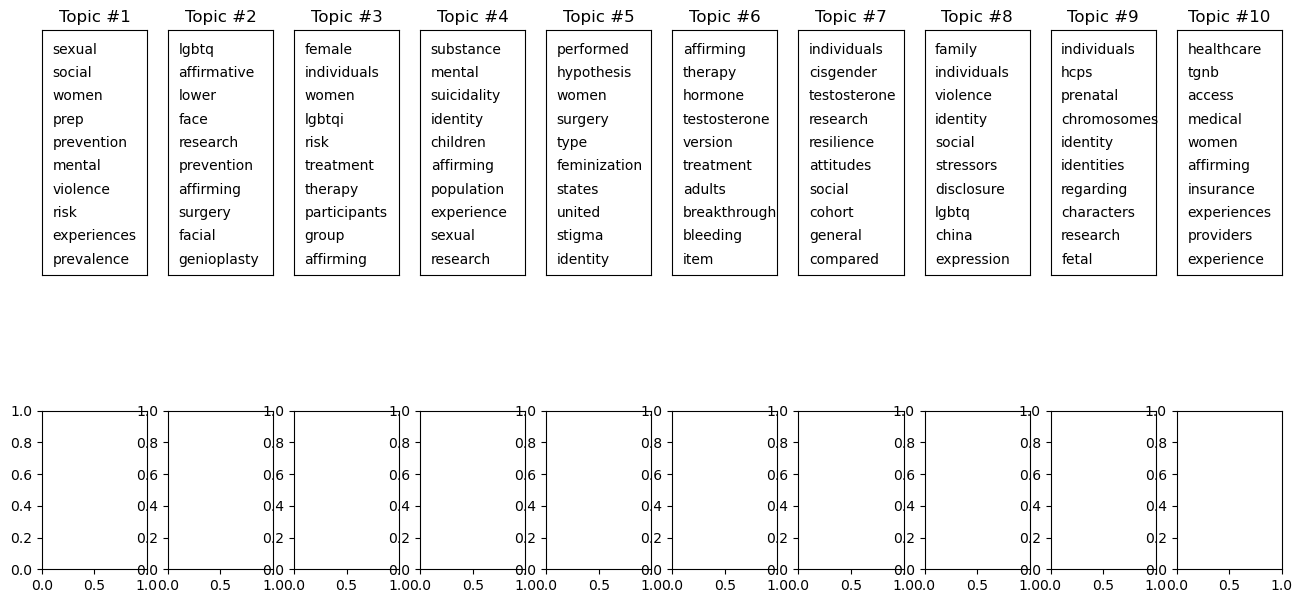

In [129]:
## Print LDA using print function from above
########## Other Notes ####################
#import pyLDAvis.sklearn as LDAvis
#import pyLDAvis
#import pyLDAvis.gensim 
## conda install -c conda-forge pyldavis
#pyLDAvis.enable_notebook() ## not using notebook
#panel = LDAvis.prepare(lda_model_DH, MyDTM_DF, MyCountV, mds='tsne')
#pyLDAvis.show(panel)
#panel = pyLDAvis.gensim.prepare(lda_model_DH, MyDTM, MyCountV, mds='tsne')
#pyLDAvis.show(panel)
##########################################################################

word_topic = np.array(lda_model_DH.components_)
#print(word_topic)
word_topic = word_topic.transpose()

num_top_words = 10
vocab_array = np.asarray(vocab)

#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 10

fig,ax = plt.subplots(3,10,figsize=(16,7))

for t in range(num_topics):
    plt.subplot(2, num_topics, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t+1))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    #print(top_words)
    top_words_shares = word_topic[top_words_idx, t]
    #print(top_words_shares)
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.1, num_top_words-i-0.5, word, fontsize=fontsize_base)
                 ##fontsize_base*share)

#plot(figsize = (20,12))
plt.tight_layout()
# pad=5, h_pad=0.5, w_pad=None, rect=None
plt.show()

Topic:   0
[('women', 72.56318393425622), ('harassment', 24.62219548938135), ('syndemic', 21.647142020154565), ('self', 20.58987413864621), ('conditions', 19.635639106869156), ('suicidality', 18.575972799253723), ('research', 17.729040767663708), ('seven', 15.480217456562992), ('attitudes', 15.267187081757529), ('mental', 14.792525188288693), ('reported', 14.059388774784983), ('relationship', 13.962067871842399), ('certain', 13.92773161488608), ('conducted', 13.731672842341643), ('insurance', 13.65919729539912)]
Topic:   1
[('testosterone', 32.171445460042754), ('lgbtqi', 29.68394718109907), ('cohort', 23.069055959197296), ('breast', 18.573430854873425), ('male', 17.86871561620354), ('population', 17.330236113320414), ('individuals', 16.657094664331453), ('general', 16.332332584956717), ('female', 13.49591495370108), ('research', 12.54793081877232), ('increased', 11.959972813856774), ('implantation', 11.959502116912738), ('surgery', 11.958572914807878), ('cancer', 11.576394166672527), 

/tmp/ipykernel_195/2306806686.py:33: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, num_topics, t + 1)  # plot numbering starts with 1
/tmp/ipykernel_195/2306806686.py:49: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


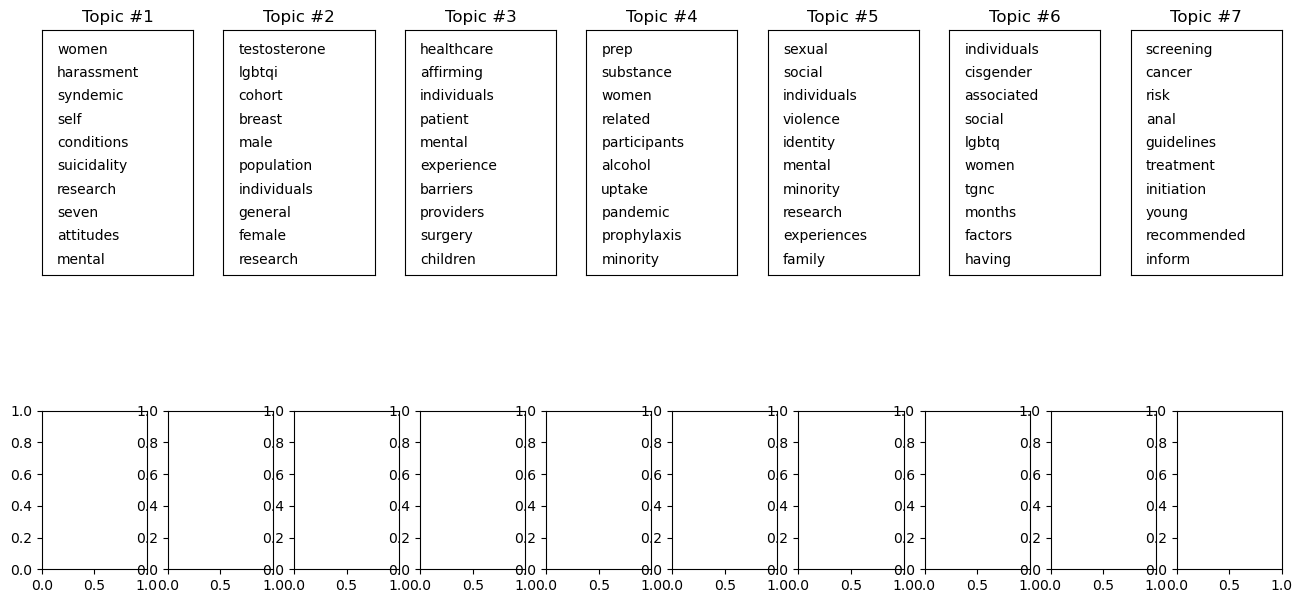

In [130]:
num_topics = 7

lda_model_DH = LatentDirichletAllocation(n_components=num_topics, 
                                         max_iter=100, learning_method='online')
#lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online')
LDA_DH_Model = lda_model_DH.fit_transform(MyDTM_DF)

def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic:  ", idx)
      
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])
                        ## gets top n elements in decreasing order
    

####### call the function above with our model and CountV
print_topics(lda_model_DH, MyCountV, 15)

word_topic = np.array(lda_model_DH.components_)
#print(word_topic)
word_topic = word_topic.transpose()

num_top_words = 10
vocab_array = np.asarray(vocab)

#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 10

fig,ax = plt.subplots(3,10,figsize=(16,7))

for t in range(num_topics):
    plt.subplot(2, num_topics, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t+1))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    #print(top_words)
    top_words_shares = word_topic[top_words_idx, t]
    #print(top_words_shares)
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.1, num_top_words-i-0.5, word, fontsize=fontsize_base)
                 ##fontsize_base*share)

#plot(figsize = (20,12))
plt.tight_layout()
# pad=5, h_pad=0.5, w_pad=None, rect=None
plt.show()

Topic:   0
[('women', 111.2077708932563), ('individuals', 91.67731431467311), ('affirming', 88.62891191968154), ('family', 64.36890064597078), ('healthcare', 57.47063917667994), ('violence', 48.5842157561268), ('associated', 38.70974775426293), ('participants', 37.294352683043286), ('mental', 36.44166537683852), ('social', 36.2725082322468), ('access', 33.52726999043791), ('identity', 33.51396773393627), ('experiences', 32.844490008563895), ('research', 31.2802112807849), ('dysphoria', 31.23845680296434)]
Topic:   1
[('lgbtq', 37.312963821216805), ('substance', 22.749050445541172), ('attitudes', 21.22437869790333), ('suicidality', 17.62557687645414), ('loneliness', 15.612779510924133), ('affirmative', 14.069949798753647), ('participants', 14.018293069124184), ('research', 13.132260683617535), ('women', 13.00582032966998), ('mental', 11.771166985819235), ('training', 11.012136736140794), ('online', 11.005613132942022), ('identities', 9.47754649692084), ('intentions', 9.46790415807244), 

/tmp/ipykernel_195/2273718453.py:33: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, num_topics, t + 1)  # plot numbering starts with 1
/tmp/ipykernel_195/2273718453.py:49: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


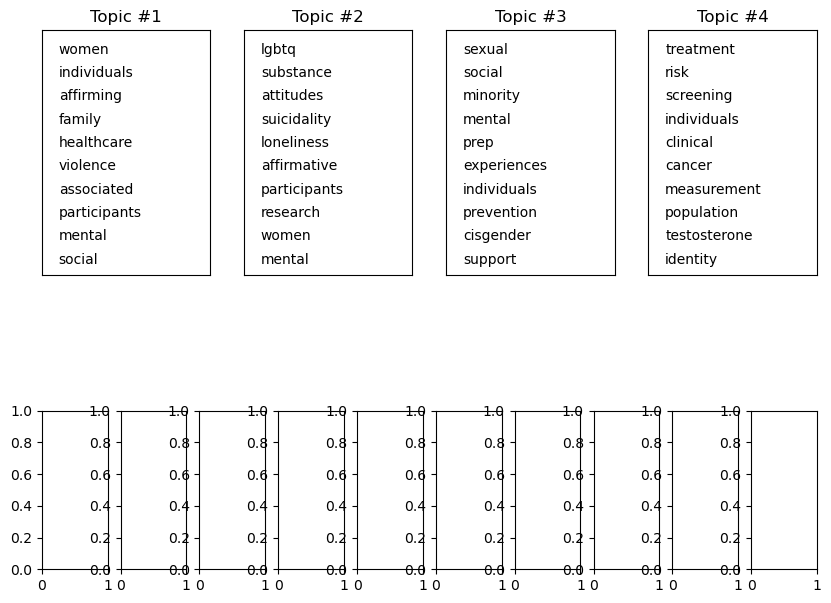

In [132]:
num_topics = 4

lda_model_DH = LatentDirichletAllocation(n_components=num_topics, 
                                         max_iter=100, learning_method='online')
#lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online')
LDA_DH_Model = lda_model_DH.fit_transform(MyDTM_DF)

def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic:  ", idx)
      
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])
                        ## gets top n elements in decreasing order
    

####### call the function above with our model and CountV
print_topics(lda_model_DH, MyCountV, 15)

/tmp/ipykernel_195/2669313359.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, num_topics, t + 1)  # plot numbering starts with 1
/tmp/ipykernel_195/2669313359.py:30: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


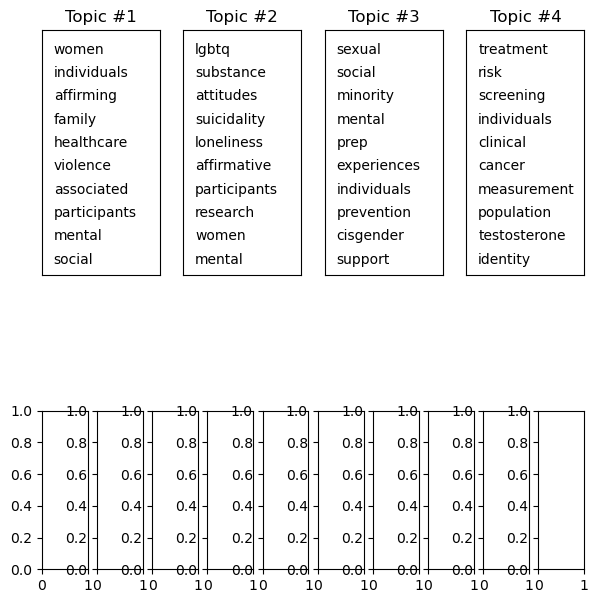

In [133]:
word_topic = np.array(lda_model_DH.components_)
#print(word_topic)
word_topic = word_topic.transpose()

num_top_words = 10
vocab_array = np.asarray(vocab)

#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 10

fig,ax = plt.subplots(3,10,figsize=(7,7))

for t in range(num_topics):
    plt.subplot(2, num_topics, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t+1))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    #print(top_words)
    top_words_shares = word_topic[top_words_idx, t]
    #print(top_words_shares)
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.1, num_top_words-i-0.5, word, fontsize=fontsize_base)
                 ##fontsize_base*share)

#plot(figsize = (20,12))
plt.tight_layout()
# pad=5, h_pad=0.5, w_pad=None, rect=None
plt.show()

In [139]:
num_topics = 5

lda_model_DH = LatentDirichletAllocation(n_components=num_topics, 
                                         max_iter=100, learning_method='online')
#lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online')
LDA_DH_Model = lda_model_DH.fit_transform(MyDTM_DF)

def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic:  ", idx)
      
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])
                        ## gets top n elements in decreasing order
    

####### call the function above with our model and CountV
print_topics(lda_model_DH, MyCountV, 15)

Topic:   0
[('social', 121.30033311876147), ('individuals', 100.61331328167337), ('sexual', 87.15732844439465), ('mental', 86.09821989433836), ('risk', 78.26080539926866), ('cisgender', 73.50902152045437), ('support', 69.10069584643999), ('violence', 67.3815549782826), ('women', 66.87516956340917), ('minority', 60.47802832411884), ('stress', 59.00119931699865), ('experiences', 58.40961989927785), ('research', 51.940195492963035), ('screening', 49.11698124642577), ('family', 48.056722270910676)]
Topic:   1
[('sexual', 108.86155208748872), ('identity', 63.15540104688226), ('youth', 49.89349104848276), ('clinical', 45.83945854911358), ('healthcare', 44.22400890768398), ('children', 42.97999789732208), ('social', 40.45659264379101), ('disparities', 40.147987134517955), ('examined', 40.11175352524388), ('prevention', 39.1550726982171), ('experience', 38.24494406978139), ('participants', 37.66983971836515), ('women', 36.60403142403049), ('unique', 35.8611275370253), ('measurement', 35.771166

/tmp/ipykernel_195/2669313359.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, num_topics, t + 1)  # plot numbering starts with 1
/tmp/ipykernel_195/2669313359.py:30: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


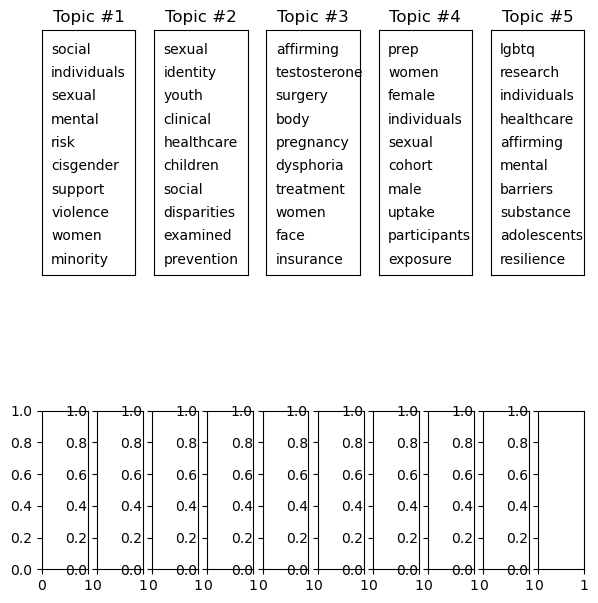

In [140]:
word_topic = np.array(lda_model_DH.components_)
#print(word_topic)
word_topic = word_topic.transpose()

num_top_words = 10
vocab_array = np.asarray(vocab)

#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 10

fig,ax = plt.subplots(3,10,figsize=(7,7))

for t in range(num_topics):
    plt.subplot(2, num_topics, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t+1))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    #print(top_words)
    top_words_shares = word_topic[top_words_idx, t]
    #print(top_words_shares)
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.1, num_top_words-i-0.5, word, fontsize=fontsize_base)
                 ##fontsize_base*share)

#plot(figsize = (20,12))
plt.tight_layout()
# pad=5, h_pad=0.5, w_pad=None, rect=None
plt.show()

In [141]:
num_topics = 6

lda_model_DH = LatentDirichletAllocation(n_components=num_topics, 
                                         max_iter=100, learning_method='online')
#lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online')
LDA_DH_Model = lda_model_DH.fit_transform(MyDTM_DF)

def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic:  ", idx)
      
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])
                        ## gets top n elements in decreasing order
    

####### call the function above with our model and CountV
print_topics(lda_model_DH, MyCountV, 15)

Topic:   0
[('mental', 55.98496419443143), ('clinical', 48.767089075352835), ('social', 37.96827673962612), ('measurement', 35.73660145963347), ('lgbtq', 32.189451452455565), ('measures', 31.82834841620284), ('research', 31.315441614220788), ('self', 29.667189390148142), ('participants', 27.745700176481257), ('youth', 27.648443355752747), ('groups', 26.619873285842417), ('determinants', 26.164538009970606), ('used', 25.007147947177387), ('standardized', 24.391802791999897), ('problems', 24.35701410275992)]
Topic:   1
[('women', 22.636691801602023), ('conditions', 20.136402834497), ('syndemic', 20.13526121382794), ('identities', 13.992601530630793), ('social', 12.45669185647532), ('properties', 12.454845006770357), ('face', 10.920673295614288), ('associated', 10.92036875609331), ('mental', 10.920252425985446), ('hypothesis', 10.918929646872682), ('engagement', 9.384943132713708), ('community', 9.384635232721424), ('testosterone', 9.38443836620487), ('characters', 9.382907005023018), ('l

/tmp/ipykernel_195/2330801335.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, num_topics, t + 1)  # plot numbering starts with 1
/tmp/ipykernel_195/2330801335.py:30: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


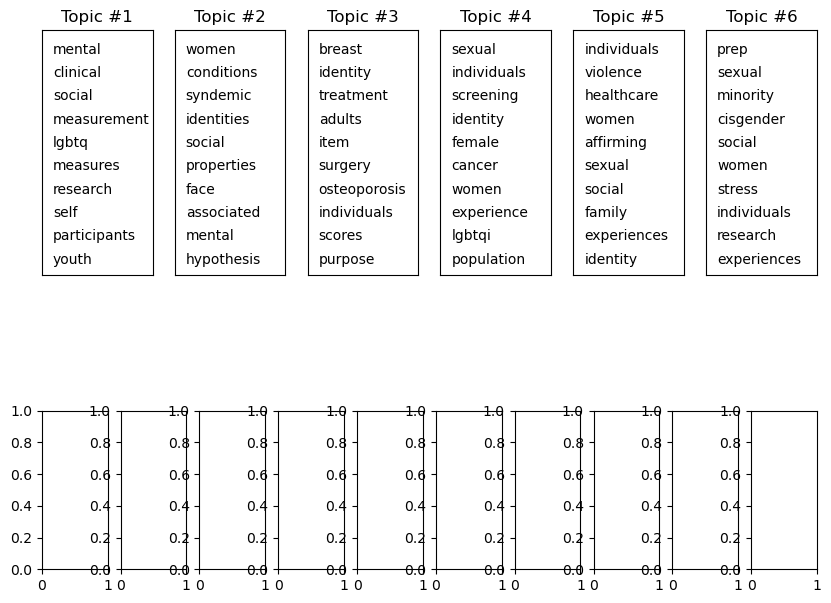

In [144]:
word_topic = np.array(lda_model_DH.components_)
#print(word_topic)
word_topic = word_topic.transpose()

num_top_words = 10
vocab_array = np.asarray(vocab)

#fontsize_base = 70 / np.max(word_topic) # font size for word with largest share in corpus
fontsize_base = 10

fig,ax = plt.subplots(3,10,figsize=(10,7))

for t in range(num_topics):
    plt.subplot(2, num_topics, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t+1))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    #print(top_words)
    top_words_shares = word_topic[top_words_idx, t]
    #print(top_words_shares)
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.1, num_top_words-i-0.5, word, fontsize=fontsize_base)
                 ##fontsize_base*share)

#plot(figsize = (20,12))
plt.tight_layout()
# pad=5, h_pad=0.5, w_pad=None, rect=None
plt.show()

In [181]:
num_topics = 4

lda_model_DH = LatentDirichletAllocation(n_components=num_topics, 
                                         max_iter=100, learning_method='online')
#lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, learning_method='online')
LDA_DH_Model = lda_model_DH.fit_transform(MyDTM_DF)

def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic:  ", idx)
      
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])
                        ## gets top n elements in decreasing order
    

####### call the function above with our model and CountV
print_topics(lda_model_DH, MyCountV, 15)

Topic:   0
[('sexual', 209.9723057221559), ('minority', 100.22963780314049), ('individuals', 90.6448640438654), ('lgbtq', 83.68427109278444), ('experiences', 74.13540448356909), ('women', 70.93385182831489), ('social', 70.0732667824068), ('mental', 66.71055864743678), ('identity', 66.24569550335434), ('stress', 66.04569912350817), ('healthcare', 60.680401635952116), ('cisgender', 58.86338152434592), ('identities', 56.4496232004), ('prevention', 54.949114757923475), ('risk', 52.5009311600413)]
Topic:   1
[('mental', 60.63399201800937), ('affirming', 46.66041921369531), ('youth', 39.855177458469), ('clinical', 39.37411918394348), ('social', 39.283689392881946), ('treatment', 37.25340289619531), ('measurement', 35.81006078374741), ('identify', 35.19324718845868), ('used', 31.174289112363812), ('determinants', 27.782540799460183), ('research', 27.3328673062743), ('individuals', 27.027337293647538), ('program', 26.47410412356321), ('factors', 26.428412029291646), ('groups', 25.9714914297819

In [177]:
!pip install pandas==1.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 14.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.1
    Uninstalling pandas-2.2.1:
      Successfully uninstalled pandas-2.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.1 which is incompatible.


In [180]:
import pyLDAvis.gensim_models
vis = pyLDAvis.gensim_models.prepare(lda_model_DH, corpus, id2word)
vis

## GOT IT!!
#vocab= MyCountV.get_feature_names_out()

#count_list = MyDTM.toarray().sum(axis=0)

#panel = LDAvis.prepare(lda_model_DH, MyDTM, MyCountV,vocab,count_list, mds='tsne')

#pyLDAvis.save_html(panel, "Dog_Hike_Topics.html")



TypeError: 'LatentDirichletAllocation' object is not iterable

In [174]:

#import pyLDAvis


# ## conda install -c conda-forge pyldavis
#pyLDAvis.enable_notebook() ## not using notebook

#print(lda_model_DH.components_)
#print(Vect_DH)
#print(MyVectLDA_DH)

## GOT IT!!

panel = LDAvis.prepare(lda_model_DH, LDA_DH_Model, MyVectLDA_DH, mds='tsne')

pyLDAvis.save_html(panel, "Dog_Hike_Topics.html")


NameError: name 'MyVectLDA_DH' is not defined